In [1]:
import sys
import os
import importlib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# import own helpers
import countperyear_to_table
# uncomment next line to reload the helper after code change
# importlib.reload(countperyear_to_table)

In [3]:
# grab the count of people alive for each year.
# There's two files: one containing the data from [1800, 1900), and one from [1900, 2010].
x_years, total_per_year, male_per_year, female_per_year = \
    (np.array(a) for a in
    countperyear_to_table.fullcount_output(
    "../output/peryear/countperyear_out.txt", "../output/peryear/with_alive2.txt")
    )

In [4]:
# you can check the data here.
# total_per_year

In [5]:
# Graph the number of people alive per each year.

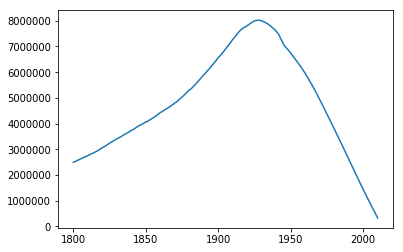

In [6]:
def graph_alive_per_year_all():
    plt.plot(x_years, total_per_year)
graph_alive_per_year_all()

In [7]:
# The population grows until the start of the 20th century, then sharply drops off. Which year does it drop off?

In [8]:
x_years[list(total_per_year).index(max(total_per_year))]

1928

In [9]:
# I think? the dropoff is because people making geneologies are more interested in knowing about their ancestors
# not their living relatives?
# So maybe this data isn't a good representation of the population, although it does pass a few more tests,
# for example: if we expect this data to represent the population, the male/female ratio should be around 50%.

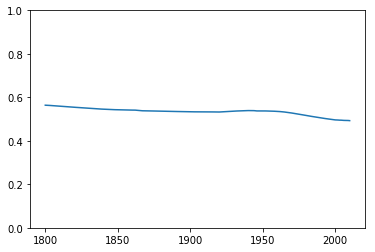

In [10]:
def graph_male_female_ratio():
    plt.ylim(0, 1)
    plt.plot(x_years, male_per_year / total_per_year)
graph_male_female_ratio()

In [11]:
# Indeed, male-female ratio starts at 56% and ends around 50% (maybe it's easier to find one's male ancestors?)

In [12]:
# now load each 